In [16]:
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml

%matplotlib inline

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [56]:
X, y = fetch_openml('mnist_784', version=1, return_X_y=True, as_frame=False)

In [58]:
print(X.shape)

(70000, 784)


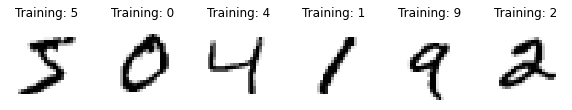

In [59]:
_, axes = plt.subplots(nrows=1, ncols=6, figsize=(10, 3))

for ax, image, label in zip(axes, X, y):
    ax.set_axis_off()
    ax.imshow(image.reshape((28, 28)), cmap=plt.cm.gray_r, interpolation="nearest")
    ax.set_title("Training: %s" % str(label))

In [140]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.utils import check_random_state
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from sklearn.model_selection import KFold
from sklearn.base import clone

import numpy as np

In [63]:
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [131]:
train_samples = 10000

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=train_samples, test_size=5000)

In [138]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

kf = KFold(n_splits=3, shuffle=False)

In [150]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    DecisionTreeClassifier(max_depth=5),
    LogisticRegression(C=50.0 / 5000, penalty="l1", solver="saga", tol=0.1)
]

In [151]:
clf = classifiers[3]

trained_clf = []
accuracy_list = []

for train_index, test_index in kf.split(X_train):
    X_train_fold, X_test_fold = X_train[train_index], X_train[test_index]
    y_train_fold, y_test_fold = y_train[train_index], y_train[test_index]
    
    clf_fold = clone(clf)
    clf_fold.fit(X_train_fold, y_train_fold)

    prediction = clf_fold.predict(X_test_fold)
    accuracy = accuracy_score(y_test_fold, prediction)

    trained_clf.append(clf_fold)
    accuracy_list.append(accuracy)

In [152]:
for idx, classifier in enumerate(trained_clf):
    Z = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, Z)
    print('Fold ', str(idx))
    print("Fold test accuracy:         %.4f" % accuracy_list[idx])
    print("Test accuracy:              %.4f" % accuracy)

Fold  0
Fold test accuracy:         0.8449
Test accuracy:              0.8400
Fold  1
Fold test accuracy:         0.8482
Test accuracy:              0.8436
Fold  2
Fold test accuracy:         0.8314
Test accuracy:              0.8400
